### Importing libraries

In [2]:
# Add directory root path
import sys
sys.path.append("..") 
# Import default libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import logging
# Import Biopython utils
from Bio.PDB import PDBList, calc_angle, calc_dihedral, PPBuilder, is_aa, PDBIO, NeighborSearch, DSSP, HSExposureCB
from Bio.PDB.PDBParser import PDBParser
from Bio.SeqUtils import IUPACData
from Bio.PDB.PDBIO import Select
# Import custom libraries
from modules.feature_extraction import *
from modules.feature_preprocessing import *

### Initial configuration

In [7]:
# Set debug info
logging.basicConfig(level=logging.DEBUG)

### Importing original dataset (LIP tagged sequences)

In [8]:
# Read original dataset (lips_dataset)
ds_original = pd.read_csv('../datasets/lips_dataset.txt', sep='\t')
# Define new dataset
ds_original.head()

,pdb,chain,start,end,type
0,1cee,A,neg,neg,long
1,1cee,B,1,47,long
2,1dev,A,neg,neg,long
3,1dev,B,669,709,long
4,1dow,A,neg,neg,long


### Downloading proteins (automatically skips a protein if it has already been downloaded)

In [9]:
# Select all proteins (pdb column)
pdb_ids = ds_original.pdb.unique()
# Define pdb files dir
pdb_dir = '../pdb_files'
# Downloads pdb files
download_PDB(pdb_ids, pdb_dir)

DEBUG:root:PDB file which will be downloaded
DEBUG:root:1cee
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1dev
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1dow
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1fqj
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1g3j
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1hrt
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1i7w
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1j2j
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1jsu
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1kil
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1l8c
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1p4q
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1pq1
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1q68
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1rf8
DEBUG:root:PDB file which will be downloaded
DEBUG:root:1sc5
DEBUG:root:PDB file whic

Structure exists: '../pdb_files/pdb1cee.ent' 
Structure exists: '../pdb_files/pdb1dev.ent' 
Structure exists: '../pdb_files/pdb1dow.ent' 
Structure exists: '../pdb_files/pdb1fqj.ent' 
Structure exists: '../pdb_files/pdb1g3j.ent' 
Structure exists: '../pdb_files/pdb1hrt.ent' 
Structure exists: '../pdb_files/pdb1i7w.ent' 
Structure exists: '../pdb_files/pdb1j2j.ent' 
Structure exists: '../pdb_files/pdb1jsu.ent' 
Structure exists: '../pdb_files/pdb1kil.ent' 
Structure exists: '../pdb_files/pdb1l8c.ent' 
Structure exists: '../pdb_files/pdb1p4q.ent' 
Structure exists: '../pdb_files/pdb1pq1.ent' 
Structure exists: '../pdb_files/pdb1q68.ent' 
Structure exists: '../pdb_files/pdb1rf8.ent' 
Structure exists: '../pdb_files/pdb1sc5.ent' 
Structure exists: '../pdb_files/pdb1sqq.ent' 
Structure exists: '../pdb_files/pdb1tba.ent' 
Structure exists: '../pdb_files/pdb1th1.ent' 
Structure exists: '../pdb_files/pdb1xtg.ent' 
Structure exists: '../pdb_files/pdb1ymh.ent' 
Structure exists: '../pdb_files/pd

### Creating redidues dataset

In [10]:
# Define a set containing (pdb_id, chain_id)
valid_chains = set([(row['pdb'], row['chain']) for idx, row in ds_original.iterrows()])

In [11]:
# Retrieve residues from PDB ids
ds_residues = get_PDB(pdb_ids, pdb_dir=pdb_dir, valid_chains=valid_chains)
ds_residues.shape

DEBUG:root:Directory for PDB files
DEBUG:root:../pdb_files
DEBUG:root:Chain length
DEBUG:root:True
DEBUG:root:Valid chains
DEBUG:root:{('2pg1', 'A'), ('1j2j', 'B'), ('1sc5', 'A'), ('1dow', 'A'), ('2oq1', 'B'), ('1cee', 'A'), ('1apm', 'E'), ('1i7w', 'A'), ('2b3g', 'B'), ('2pg1', 'I'), ('2fym', 'C'), ('1a81', 'B'), ('1mv0', 'A'), ('2b3g', 'A'), ('1nx1', 'A'), ('2ivz', 'A'), ('1dev', 'A'), ('1l8c', 'A'), ('1mxl', 'C'), ('1hv2', 'A'), ('1th1', 'A'), ('1sc5', 'B'), ('1apm', 'I'), ('1o9a', 'A'), ('1g3j', 'A'), ('1cqt', 'I'), ('1p16', 'D'), ('1tba', 'A'), ('1zoq', 'C'), ('1th1', 'C'), ('2nl9', 'B'), ('1hrt', 'I'), ('1o9a', 'B'), ('2gl7', 'D'), ('1axc', 'A'), ('1kdx', 'B'), ('1mv0', 'B'), ('2gsi', 'X'), ('2pg1', 'G'), ('1jsu', 'A'), ('2auh', 'A'), ('1fv1', 'C'), ('1r1r', 'A'), ('2fym', 'B'), ('3b71', 'D'), ('1dev', 'B'), ('1ozs', 'B'), ('1nx1', 'C'), ('2fym', 'A'), ('1t08', 'C'), ('1xtg', 'A'), ('2c1t', 'B'), ('1p16', 'B'), ('1un0', 'A'), ('1sqq', 'A'), ('1lm8', 'H'), ('1j2x', 'A'), ('1p22', '

(17911, 8)

In [12]:
# Filter only valid residues
ds_residues = ds_residues[pd.Series(list(zip(ds_residues.PDB_ID, ds_residues.CHAIN_ID))).isin(valid_chains)]
ds_residues.shape

(17911, 8)

In [13]:
# Shwo some results
ds_residues.head()

,PDB_ID,MODEL_ID,CHAIN_ID,CHAIN_LEN,RES_ID,RES_NAME,LIP_SCORE,LIP
0,1cee,0,A,179,1,MET,0,0
1,1cee,0,A,179,2,GLN,0,0
2,1cee,0,A,179,3,THR,0,0
3,1cee,0,A,179,4,ILE,0,0
4,1cee,0,A,179,5,LYS,0,0


### Tagging LIP residues

In [14]:
# Launch tagging algorithm: we have 0 positively tagged residues
LIP_tag(ds_original, ds_residues)
# Show first positively tagged LIP residues
ds_residues[ds_residues.LIP == 1].head()

,PDB_ID,MODEL_ID,CHAIN_ID,CHAIN_LEN,RES_ID,RES_NAME,LIP_SCORE,LIP
179,1cee,0,B,59,1,LYS,1,1
180,1cee,0,B,59,2,LYS,1,1
181,1cee,0,B,59,3,LYS,1,1
182,1cee,0,B,59,4,ILE,1,1
183,1cee,0,B,59,5,SER,1,1


### Check dataset balancement

We check if we have the same numerosity of LIP and npn-LIP tagged residues.

In [15]:
# Compute numerosity of LIP tagged residues
print('Numerosity of LIP tagged residues: {}'.format(ds_residues[ds_residues.LIP == 1].shape[0]))
# Compute numerosity of non-LIP tagged residues
print('Numerosity of non-LIP tagged residues: {}'.format(ds_residues[ds_residues.LIP == 0].shape[0]))

Numerosity of LIP tagged residues: 1883
Numerosity of non-LIP tagged residues: 16028


## Feature extraction

### DSSP features (angles, etc.)

In [16]:
# Get DSSP dataframe
ds_dssp = get_DSSP(ds_original.pdb.unique(), pdb_dir)

DEBUG:root:PDB ids: ['1cee' '1dev' '1dow' '1fqj' '1g3j' '1hrt' '1i7w' '1j2j' '1jsu' '1kil'
 '1l8c' '1p4q' '1pq1' '1q68' '1rf8' '1sc5' '1sqq' '1tba' '1th1' '1xtg'
 '1ymh' '1zoq' '2a6q' '2auh' '2c1t' '2o8a' '3b71' '1a3b' '1k2d' '1ej4'
 '1mv0' '1t08' '1hv2' '1p16' '1ee5' '1ozs' '2phe' '1sb0' '1j2x' '1axc'
 '2gl7' '1h2k' '1ycq' '1p22' '2iv8' '1tce' '1r1r' '1mxl' '2fym' '1iwq'
 '1fv1' '1dpj' '2b3g' '2nl9' '1o9a' '1sqk' '1nx1' '2gsi' '1i8h' '1p4b'
 '2ivz' '1lm8' '1emu' '1un0' '1a81' '2oq1' '1kdx' '1h8b' '1dt7' '2pg1'
 '1apm' '1cqt']
DEBUG:root:PDB directory: '../pdb_files'


In [17]:
# Show some data
ds_dssp.head()

,PDB_ID,CHAIN_ID,RES_ID,SEC_STRUCT,REL_ASA,PHI,PSI,NH_O_1_relidx,NH_O_1_energy,O_NH_1_relidx,O_NH_1_energy,NH_O_2_relidx,H_O_2_energy,O_NH_2_relidx,O_NH_2_energy
0,1cee,A,1,-,1.000000,360.0,97.6,0,0.0,2,-0.3,0,0.0,50,-0.1
1,1cee,A,2,-,0.348485,-91.3,147.8,48,-0.1,50,-1.7,51,-0.0,2,-0.3
2,1cee,A,3,E,0.387324,-142.6,136.7,-2,-0.3,50,-0.2,48,-0.2,2,-0.2
3,1cee,A,4,E,0.005917,-94.3,154.4,48,-1.9,50,-1.6,-2,-0.3,2,-0.6
4,1cee,A,5,E,0.346341,-112.5,70.5,-2,-0.2,71,-1.6,48,-0.1,2,-0.8


In [18]:
# Check NULL values in PHI and PSI columns
ds_dssp[['PHI', 'PSI']].isna().sum().sum()

0

In [19]:
# Merge DSSP features in ds_residues dataset
ds_residues = ds_residues.merge(ds_dssp, on=['PDB_ID', 'CHAIN_ID', 'RES_ID'], how='left')
# Check new datset
ds_residues.head()

,PDB_ID,MODEL_ID,CHAIN_ID,CHAIN_LEN,RES_ID,RES_NAME,LIP_SCORE,LIP,SEC_STRUCT,REL_ASA,PHI,PSI,NH_O_1_relidx,NH_O_1_energy,O_NH_1_relidx,O_NH_1_energy,NH_O_2_relidx,H_O_2_energy,O_NH_2_relidx,O_NH_2_energy
0,1cee,0,A,179,1,MET,0,0,-,1.000000,360.0,97.6,0.0,0.0,2.0,-0.3,0.0,0.0,50.0,-0.1
1,1cee,0,A,179,2,GLN,0,0,-,0.348485,-91.3,147.8,48.0,-0.1,50.0,-1.7,51.0,-0.0,2.0,-0.3
2,1cee,0,A,179,3,THR,0,0,E,0.387324,-142.6,136.7,-2.0,-0.3,50.0,-0.2,48.0,-0.2,2.0,-0.2
3,1cee,0,A,179,4,ILE,0,0,E,0.005917,-94.3,154.4,48.0,-1.9,50.0,-1.6,-2.0,-0.3,2.0,-0.6
4,1cee,0,A,179,5,LYS,0,0,E,0.346341,-112.5,70.5,-2.0,-0.2,71.0,-1.6,48.0,-0.1,2.0,-0.8


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/damiclem/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


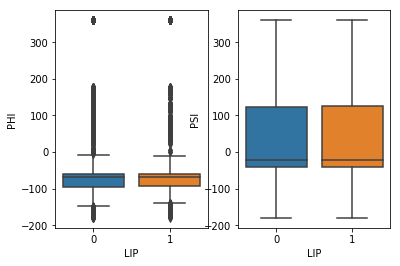

In [20]:
fig, ax = plt.subplots(1, 2)
_ = sns.boxplot(x='LIP', y='PHI',data=ds_residues, ax=ax[0])
_ = sns.boxplot(x='LIP', y='PSI',data=ds_residues, ax=ax[1])

### RING features

In [21]:
# Define folder for ring files
ring_dir = '../ring_files'
# Define PDB files for which RING feature extraction is required
pdb_ids = ds_original.pdb.unique()
# Define contact treshold to consider
contact_threshold = 3.5
# Flag for actually extract RING files
enable_ring = False

In [22]:
if enable_ring:
    # Download chunk of 5 files per time
    for i in range(0, len(pdb_ids), 5):
        # Download required RING files
        download_RING(pdb_ids[i:i+5], ring_dir)

In [23]:
# Get edges info from RING
ds_ring = get_RING(pdb_ids, pdb_dir, ring_dir, contact_threshold)
ds_ring.head()

,PDB_ID,CHAIN_ID,RES_ID,CHAIN_ID_B,RES_ID_B,EDGE_LOC,ATOM_A,ATOM_B,EDGE_TYPE
0,1cee,A,180,A,16,LIG_SC,HZ2,MG,IAC
1,1cee,A,16,A,180,LIG_SC,MG,HZ2,IAC
2,1cee,A,180,A,17,LIG_SC,HG1,MG,IAC
3,1cee,A,17,A,180,LIG_SC,MG,HG1,IAC
4,1cee,A,180,A,17,LIG_SC,OG1,MG,IAC


In [24]:
# Compute edge features
ds_ring_edges = get_RING_edges(ds_ring)
ds_ring_edges.head()

,PDB_ID,CHAIN_ID,RES_ID,EDGE_LOC,EDGE_TYPE
0,1cee,A,2,SC_SC MC_MC SC_SC,VDW HBOND HBOND
1,1cee,A,4,MC_MC MC_MC SC_SC SC_SC SC_SC,HBOND HBOND VDW VDW VDW
2,1cee,A,5,SC_MC MC_MC,VDW HBOND
3,1cee,A,6,MC_MC MC_MC SC_SC,HBOND HBOND VDW
4,1cee,A,7,MC_MC,HBOND


In [25]:
# Merge edge features into residues DataFrame
ds_residues = ds_residues.merge(ds_ring_edges, how='left', on=['PDB_ID', 'CHAIN_ID', 'RES_ID'])
# Handle null values
ds_residues.fillna({'EDGE_LOC': '', 'EDGE_TYPE': ''}, inplace=True)
# Show some data
ds_residues.head()

,PDB_ID,MODEL_ID,CHAIN_ID,CHAIN_LEN,RES_ID,RES_NAME,LIP_SCORE,LIP,SEC_STRUCT,REL_ASA,...,NH_O_1_relidx,NH_O_1_energy,O_NH_1_relidx,O_NH_1_energy,NH_O_2_relidx,H_O_2_energy,O_NH_2_relidx,O_NH_2_energy,EDGE_LOC,EDGE_TYPE
0,1cee,0,A,179,1,MET,0,0,-,1.000000,...,0.0,0.0,2.0,-0.3,0.0,0.0,50.0,-0.1,,
1,1cee,0,A,179,2,GLN,0,0,-,0.348485,...,48.0,-0.1,50.0,-1.7,51.0,-0.0,2.0,-0.3,SC_SC MC_MC SC_SC,VDW HBOND HBOND
2,1cee,0,A,179,3,THR,0,0,E,0.387324,...,-2.0,-0.3,50.0,-0.2,48.0,-0.2,2.0,-0.2,,
3,1cee,0,A,179,4,ILE,0,0,E,0.005917,...,48.0,-1.9,50.0,-1.6,-2.0,-0.3,2.0,-0.6,MC_MC MC_MC SC_SC SC_SC SC_SC,HBOND HBOND VDW VDW VDW
4,1cee,0,A,179,5,LYS,0,0,E,0.346341,...,-2.0,-0.2,71.0,-1.6,48.0,-0.1,2.0,-0.8,SC_MC MC_MC,VDW HBOND


In [26]:
# Compute contacts features
ds_ring_contacts = get_RING_contacts(ds_ring)
ds_ring_contacts.head()

,PDB_ID,CHAIN_ID,RES_ID,INTRA_CONTACTS,INTER_CONTACTS,INTRA_INTER_CONTACTS
0,1cee,A,2,2.0,1.0,1.818182
1,1cee,A,4,5.0,0.0,50.000000
2,1cee,A,5,2.0,0.0,20.000000
3,1cee,A,6,3.0,0.0,30.000000
4,1cee,A,7,1.0,0.0,10.000000


In [27]:
# Merge contacts features into residues DataFrame
ds_residues = ds_residues.merge(ds_ring_contacts, how='left', on=['PDB_ID', 'CHAIN_ID', 'RES_ID'])
# Handle null values
ds_residues.fillna({'INTRA_CONTACTS': 0.0, 'INTER_CONTACTS': 0.0, 'INTRA_INTER_CONTACTS': 0.0}, inplace=True)
# Show some data
ds_residues.head()

,PDB_ID,MODEL_ID,CHAIN_ID,CHAIN_LEN,RES_ID,RES_NAME,LIP_SCORE,LIP,SEC_STRUCT,REL_ASA,...,O_NH_1_energy,NH_O_2_relidx,H_O_2_energy,O_NH_2_relidx,O_NH_2_energy,EDGE_LOC,EDGE_TYPE,INTRA_CONTACTS,INTER_CONTACTS,INTRA_INTER_CONTACTS
0,1cee,0,A,179,1,MET,0,0,-,1.000000,...,-0.3,0.0,0.0,50.0,-0.1,,,0.0,0.0,0.000000
1,1cee,0,A,179,2,GLN,0,0,-,0.348485,...,-1.7,51.0,-0.0,2.0,-0.3,SC_SC MC_MC SC_SC,VDW HBOND HBOND,2.0,1.0,1.818182
2,1cee,0,A,179,3,THR,0,0,E,0.387324,...,-0.2,48.0,-0.2,2.0,-0.2,,,0.0,0.0,0.000000
3,1cee,0,A,179,4,ILE,0,0,E,0.005917,...,-1.6,-2.0,-0.3,2.0,-0.6,MC_MC MC_MC SC_SC SC_SC SC_SC,HBOND HBOND VDW VDW VDW,5.0,0.0,50.000000
4,1cee,0,A,179,5,LYS,0,0,E,0.346341,...,-1.6,48.0,-0.1,2.0,-0.8,SC_MC MC_MC,VDW HBOND,2.0,0.0,20.000000


## Saving dataset to disk

### Target flags are moved to the end of the dataset

In [28]:
# First,  LIP_SCORE and LIP features are cut and moved at the end of the dataframe
ds_residues = ds_residues.drop(columns=['LIP_SCORE', 'LIP']).assign(LIP_SCORE=ds_residues['LIP_SCORE'], LIP=ds_residues['LIP'])
# Show some data
ds_residues.head()

,PDB_ID,MODEL_ID,CHAIN_ID,CHAIN_LEN,RES_ID,RES_NAME,SEC_STRUCT,REL_ASA,PHI,PSI,...,H_O_2_energy,O_NH_2_relidx,O_NH_2_energy,EDGE_LOC,EDGE_TYPE,INTRA_CONTACTS,INTER_CONTACTS,INTRA_INTER_CONTACTS,LIP_SCORE,LIP
0,1cee,0,A,179,1,MET,-,1.000000,360.0,97.6,...,0.0,50.0,-0.1,,,0.0,0.0,0.000000,0,0
1,1cee,0,A,179,2,GLN,-,0.348485,-91.3,147.8,...,-0.0,2.0,-0.3,SC_SC MC_MC SC_SC,VDW HBOND HBOND,2.0,1.0,1.818182,0,0
2,1cee,0,A,179,3,THR,E,0.387324,-142.6,136.7,...,-0.2,2.0,-0.2,,,0.0,0.0,0.000000,0,0
3,1cee,0,A,179,4,ILE,E,0.005917,-94.3,154.4,...,-0.3,2.0,-0.6,MC_MC MC_MC SC_SC SC_SC SC_SC,HBOND HBOND VDW VDW VDW,5.0,0.0,50.000000,0,0
4,1cee,0,A,179,5,LYS,E,0.346341,-112.5,70.5,...,-0.1,2.0,-0.8,SC_MC MC_MC,VDW HBOND,2.0,0.0,20.000000,0,0


### Dataset is saved to disk

In [30]:
# Save residues dataset to disk
ds_residues.to_csv('../datasets/residues.csv')